<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-9/Week%209/PCA_for_Data_Visualization_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data [found here](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv)
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# 2. Load Data

In [63]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfsaRE3Pq4HcnCgIb5hgszzYNcKQBoypmZm2zW9Q9hU9-tWdtP8qxBBsiUWMFKzG66unPOdi-lfKdM/pub?gid=794640114&single=true&output=csv')

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


# 3. Drop Unnecessary Columns

In [64]:
df.drop(columns=["Unnamed: 0","Customer Id"], inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


# 4. EDA and Cleaning

In [65]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [66]:
#Imputing missing values with mode
# mode = df["Defaulted"].mode()[0]
df["Defaulted"].fillna(0,inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

# 5. Scale Data

In [67]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

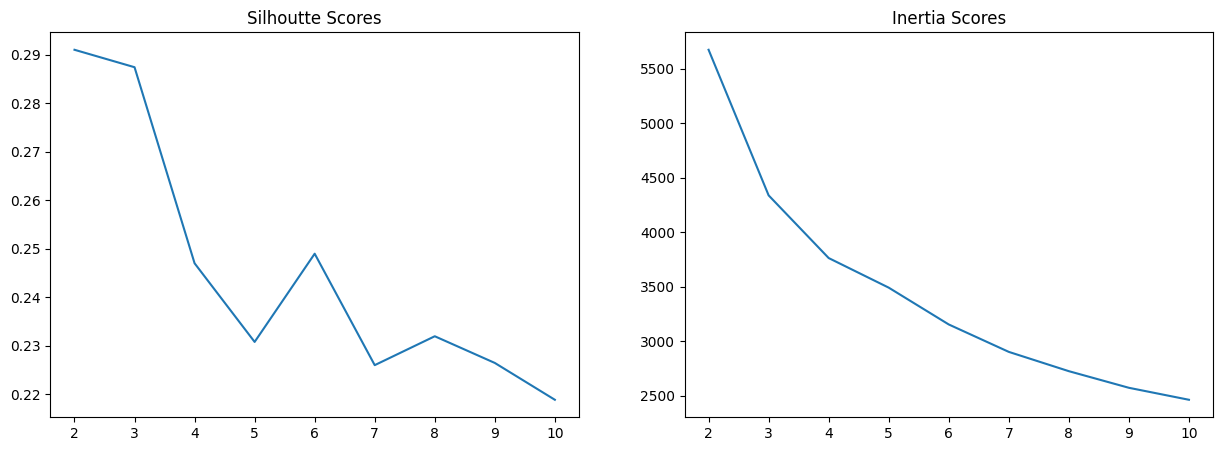

In [68]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(scaled_df)
    sils.append(silhouette_score(scaled_df, kmeans.labels_))
    inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title("Silhoutte Scores")
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title("Inertia Scores")
axes[1].set_xticks(ks);

**Silhoutte Scores** show elbows at 3,6, and 8 clusters.  However, we went the Silhoutte score to be the highest.  So, 3 clusters would be a good point to enter.

**Inertia Score** shows elbows at 3 and 4. So, 3 or 4 clusters is a consensus between our two KMeans metrics.

# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

In [69]:
#Tuning kmeans to make 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
#Gotta fit it
kmeans.fit(df)
#Assigning classifications to a new column
df["clusters"] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clusters
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,2


In [70]:
clustered_groups = df.groupby("clusters", as_index=False).mean()
clustered_groups

,clusters,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.516484,1.961538,15.340659,85.170330,3.104522,5.755670,0.131868,10.596154
1,1,32.964724,1.616564,6.401840,31.288344,1.039043,2.121957,0.237730,10.115031
2,2,45.375000,2.687500,19.687500,235.812500,6.113625,11.619312,0.250000,7.650000


# 7. Transform the Scaled Data with PCA

In [71]:
#Instantiate PCA
pca = PCA()
scaled_pca = pca.fit_transform(scaled_df)

# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

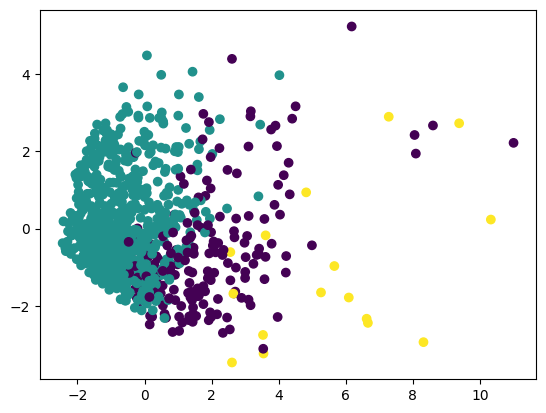

In [72]:
plt.scatter(scaled_pca[:,0], scaled_pca[:,1], c=kmeans.labels_);

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [73]:
import plotly.express as px

In [75]:
px.scatter_3d(x=scaled_pca[:,0], y=scaled_pca[:,1], z=scaled_pca[:,2], color=kmeans.labels_)